In [ ]:
# 安裝 pandas-profiling
#pip install pandas-profiling

In [ ]:
import os
import pandas as pd
import pandas_profiling
import numpy as np

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
sns.set_style('ticks')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import Dataset
df_dup = pd.read_csv('pdb_data_no_dups.csv')
df_seq = pd.read_csv('pdb_data_seq.csv')

len(df_dup), len(df_seq)

(141401, 467304)

In [ ]:
# classification 為空值的資料行
df_dup[df_dup['classification'].isnull()]

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
113250,4WM2,NaN,X-RAY DIFFRACTION,Protein,129,1.6,14495.96,BATCH MODE,293.0,1.94,36.67,Sodium chloride,NaN,2015.0
138421,5VZL,NaN,ELECTRON MICROSCOPY,Protein#RNA,1574,3.9,207247.61,NaN,NaN,NaN,NaN,NaN,NaN,2017.0


In [ ]:
# Merge the two Data set together
df_merge = pd.read_csv('pdb_data_no_dups.csv').merge(pd.read_csv('pdb_data_seq.csv'), how='inner', on='structureId')
# Drop rows with missing labels
df_merge = df_merge[[type(c) == type('') for c in df_merge.classification.values]]
df_merge = df_merge[[type(c) == type('') for c in df_merge.sequence.values]]
df_merge.reset_index()
df_merge.shape

(471117, 18)

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471117 entries, 0 to 471148
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               471117 non-null  object 
 1   classification            471117 non-null  object 
 2   experimentalTechnique     471117 non-null  object 
 3   macromoleculeType_x       435372 non-null  object 
 4   residueCount_x            471117 non-null  int64  
 5   resolution                449467 non-null  float64
 6   structureMolecularWeight  471117 non-null  float64
 7   crystallizationMethod     314748 non-null  object 
 8   crystallizationTempK      317692 non-null  float64
 9   densityMatthews           389640 non-null  float64
 10  densityPercentSol         389762 non-null  float64
 11  pdbxDetails               385462 non-null  object 
 12  phValue                   340691 non-null  float64
 13  publicationYear           413483 non-null  f

In [ ]:
df_merge.head(3)

,structureId,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount_y,macromoleculeType_y
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG,24,DNA


In [ ]:
# Merge the two Data set together
#df_merge = df_dup.merge(df_tmp ,how='inner',on='structureId')
df_merge.rename({'macromoleculeType_x':'macromoleculeType','residueCount_y':'residueCount'},axis=1,inplace=True)
df_merge.drop(['macromoleculeType_y','residueCount_x'],axis=1,inplace=True)

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471117 entries, 0 to 471148
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               471117 non-null  object 
 1   classification            471117 non-null  object 
 2   experimentalTechnique     471117 non-null  object 
 3   macromoleculeType         435372 non-null  object 
 4   resolution                449467 non-null  float64
 5   structureMolecularWeight  471117 non-null  float64
 6   crystallizationMethod     314748 non-null  object 
 7   crystallizationTempK      317692 non-null  float64
 8   densityMatthews           389640 non-null  float64
 9   densityPercentSol         389762 non-null  float64
 10  pdbxDetails               385462 non-null  object 
 11  phValue                   340691 non-null  float64
 12  publicationYear           413483 non-null  float64
 13  chainId                   471107 non-null  o

In [ ]:
df_merge.head(3)

,structureId,classification,experimentalTechnique,macromoleculeType,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG,20
1,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG,20
2,101D,DNA,X-RAY DIFFRACTION,DNA,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG,24


In [ ]:
df_isnull = pd.DataFrame(round((df_merge.isnull().sum().sort_values(ascending=False)/df_merge.shape[0])*100,1)).reset_index()
df_isnull.columns = ['Columns', '% of Missing Data']
df_isnull.style.format({'% of Missing Data': lambda x:'{:.1%}'.format(abs(x))})
cm = sns.light_palette("skyblue", as_cmap=True)
df_isnull = df_isnull.style.background_gradient(cmap=cm)
df_isnull

,Columns,% of Missing Data
0,crystallizationMethod,33.200000
1,crystallizationTempK,32.600000
2,phValue,27.700000
3,pdbxDetails,18.200000
4,densityMatthews,17.300000
5,densityPercentSol,17.300000
6,publicationYear,12.200000
7,macromoleculeType,7.600000
8,resolution,4.600000
9,chainId,0.000000


In [ ]:
# profiling report
#pandas_profiling.ProfileReport(df_merge)

In [ ]:
class_list = ['RIBOSOME','HYDROLASE','TRANSFERASE','OXIDOREDUCTASE','IMMUNE SYSTEM']
class_1 = df_merge.classification =='RIBOSOME'
class_2 = df_merge.classification =='HYDROLASE'
class_3 = df_merge.classification =='TRANSFERASE'
class_4 = df_merge.classification =='OXIDOREDUCTASE'
class_5 = df_merge.classification =='IMMUNE SYSTEM'

In [ ]:
df_class_cnt = pd.DataFrame(columns = ['class','F','T','R'])
for i in range(len(class_list)):
    class_data = (df_merge.classification ==class_list[i]).value_counts()
    df_class_cnt.loc[i] = [class_list[i], class_data[0], class_data[1], 
                           round(class_data[1]/(class_data[0]+class_data[1]), 4)]

In [ ]:
df_class_cnt

,class,F,T,R
0,RIBOSOME,410407,60710,0.1289
1,HYDROLASE,423284,47833,0.1015
2,TRANSFERASE,433391,37726,0.0801
3,OXIDOREDUCTASE,436004,35113,0.0745
4,IMMUNE SYSTEM,455128,15989,0.0339


In [ ]:
#前五大類合計筆數, 佔全部資料比率
df_merge_sub = df_merge[class_1 + class_2 + class_3 + class_4 + class_5]
df_merge_sub = df_merge_sub.reset_index(drop=True)
len(df_merge_sub),  round(len(df_merge_sub) / len(df_merge), 4)

(197371, 0.4189)

In [ ]:
df_merge_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197371 entries, 0 to 197370
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               197371 non-null  object 
 1   classification            197371 non-null  object 
 2   experimentalTechnique     197371 non-null  object 
 3   macromoleculeType         174976 non-null  object 
 4   resolution                195772 non-null  float64
 5   structureMolecularWeight  197371 non-null  float64
 6   crystallizationMethod     132467 non-null  object 
 7   crystallizationTempK      133482 non-null  float64
 8   densityMatthews           164105 non-null  float64
 9   densityPercentSol         164082 non-null  float64
 10  pdbxDetails               166324 non-null  object 
 11  phValue                   148131 non-null  float64
 12  publicationYear           172096 non-null  float64
 13  chainId                   197363 non-null  o

In [ ]:
df_merge_sub.head(3)

,structureId,classification,experimentalTechnique,macromoleculeType,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount
0,117E,HYDROLASE,X-RAY DIFFRACTION,Protein,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.0,1998.0,A,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,572
1,117E,HYDROLASE,X-RAY DIFFRACTION,Protein,2.15,65203.21,NaN,NaN,2.71,54.69,"17-19% MPD, 25 MM MES, PH 6.0, 1 MM MNCL2, 0.5...",6.0,1998.0,B,TYTTRQIGAKNTLEYKVYIEKDGKPVSAFHDIPLYADKENNIFNMV...,572
2,11BA,HYDROLASE,X-RAY DIFFRACTION,Protein,2.06,28700.28,NaN,NaN,2.48,50.36,pH 4.8,4.8,1998.0,A,KESAAAKFERQHMDSGNSPSSSSNYCNLMMCCRKMTQGKCKPVNTF...,248


In [ ]:
from sklearn.model_selection import train_test_split

# Split Data
X_train, X_test, y_train, y_test = train_test_split(df_merge_sub['sequence'], df_merge_sub['classification'], test_size = 0.2, random_state = 1)

print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (157896,)
X_test shape: (39475,)
y_train shape: (157896,)
y_test shape: (39475,)


In [ ]:
# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_transformer = TfidfVectorizer(analyzer = "char_wb", ngram_range= (4,4), sublinear_tf= True)
tfidf_transformer.fit(X_train)

X_train_df = tfidf_transformer.transform(X_train)
X_train_df.shape

(157896, 169600)

In [ ]:
X_test_df = tfidf_transformer.transform(X_test)
X_test_df.shape

(39475, 169600)

In [ ]:
# SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

model = SVC(max_iter=500, random_state=0)
model.fit(X_train_df, y_train)

predict_SVM = model.predict(X_test_df)
print(classification_report(y_test, predict_SVM))

                precision    recall  f1-score   support

     HYDROLASE       0.54      0.73      0.62      9501
 IMMUNE SYSTEM       0.86      0.90      0.88      3261
OXIDOREDUCTASE       0.66      0.58      0.62      7023
      RIBOSOME       0.97      0.89      0.93     12027
   TRANSFERASE       0.65      0.52      0.58      7663

      accuracy                           0.72     39475
     macro avg       0.74      0.72      0.73     39475
  weighted avg       0.74      0.72      0.73     39475



In [ ]:
SVM_accuracy = round(accuracy_score(y_test, predict_SVM),2)
SVM_accuracy

0.72

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_df, y_train, cv=5, scoring = "accuracy")

print("Scores:", scores)
print("\n")
print("Mean:", scores.mean())
print("\n")
print("Standard Deviation:", scores.std())

Scores: [0.75829639 0.74023877 0.76424206 0.7619304  0.75433041]


Mean: 0.7558076044435218


Standard Deviation: 0.008478130702768788


<AxesSubplot:>

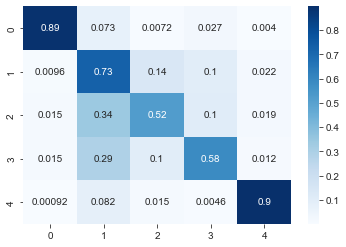

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, predict_SVM, labels = class_list)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(6, 4)
sns.heatmap(conf_mat,annot=True,cmap='Blues', fmt='.2g')

In [ ]:
class_list

['RIBOSOME', 'HYDROLASE', 'TRANSFERASE', 'OXIDOREDUCTASE', 'IMMUNE SYSTEM']

train-acc = 0.7343377919643309
test-acc = 0.7249905003166561


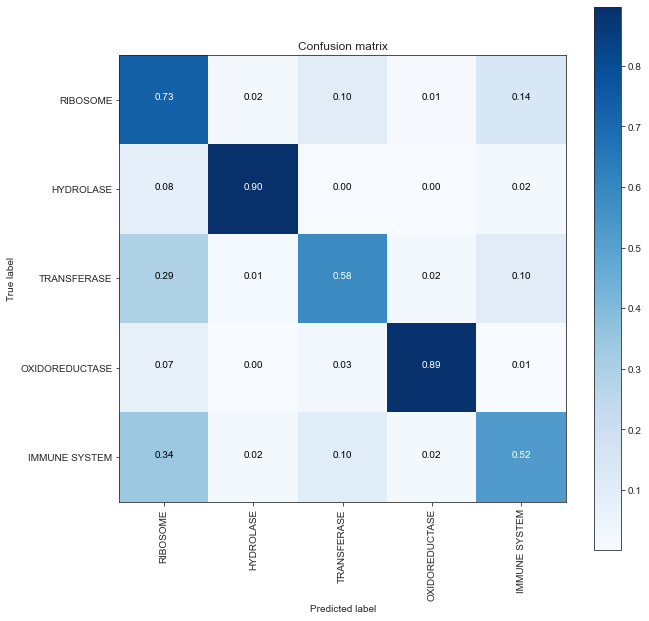

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

#for ML form X_train , y_pred, not for DL model
train_pred = model.predict(X_train_df)
test_pred = model.predict(X_test_df)
print("train-acc = " + str(accuracy_score(y_train, train_pred)))
print("test-acc = " + str(accuracy_score(y_test, test_pred)))

# Compute confusion matrix
cm = confusion_matrix(y_test, test_pred)

# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(class_list))
plt.xticks(tick_marks, class_list, rotation=90)
plt.yticks(tick_marks, class_list)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
    
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import cm
sns.set_style('ticks')
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, test_pred)
# Plot normalized confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

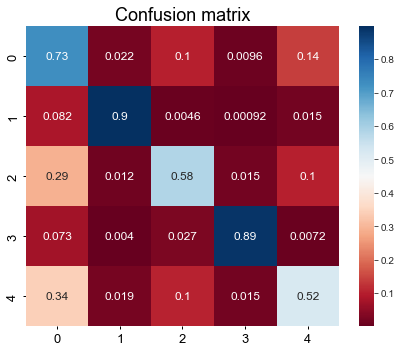

In [ ]:
colormap = plt.cm.RdBu
f, ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm, cmap=colormap, annot=True, ax=ax, annot_kws={'fontsize':12})
kwargs={'length':3, 'width':1, 'colors':'black','labelsize':13}
ax.tick_params(**kwargs)
ax.tick_params(**kwargs,axis='x')
plt.title('Confusion matrix', color='black', fontsize=18)

plt.tight_layout()
plt.show()